In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

data=pd.read_csv(
    "C:/Users/marti/OneDrive/Documentos/personal/Universidad/Econometria/ProblemSets/Advertising.csv")
#Resumen datos
print(data.shape,data.columns)
data.drop("Unnamed: 0", inplace=True,axis=1)
#auto.dropna(inplace=True) bota las filas completas con NaN?
#auto.reset_index(drop=True, inplace=True)
data.info()

(200, 5) Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


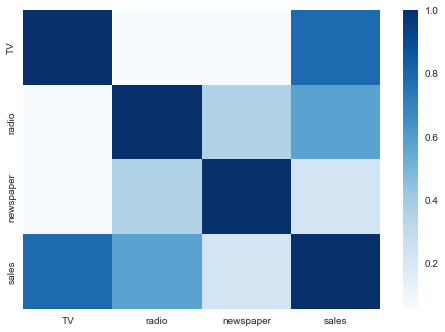

In [31]:
#sns.boxplot(x="State",y="Profit",data=data)
sns.heatmap(data.corr(),cmap="Blues")
data.corr()

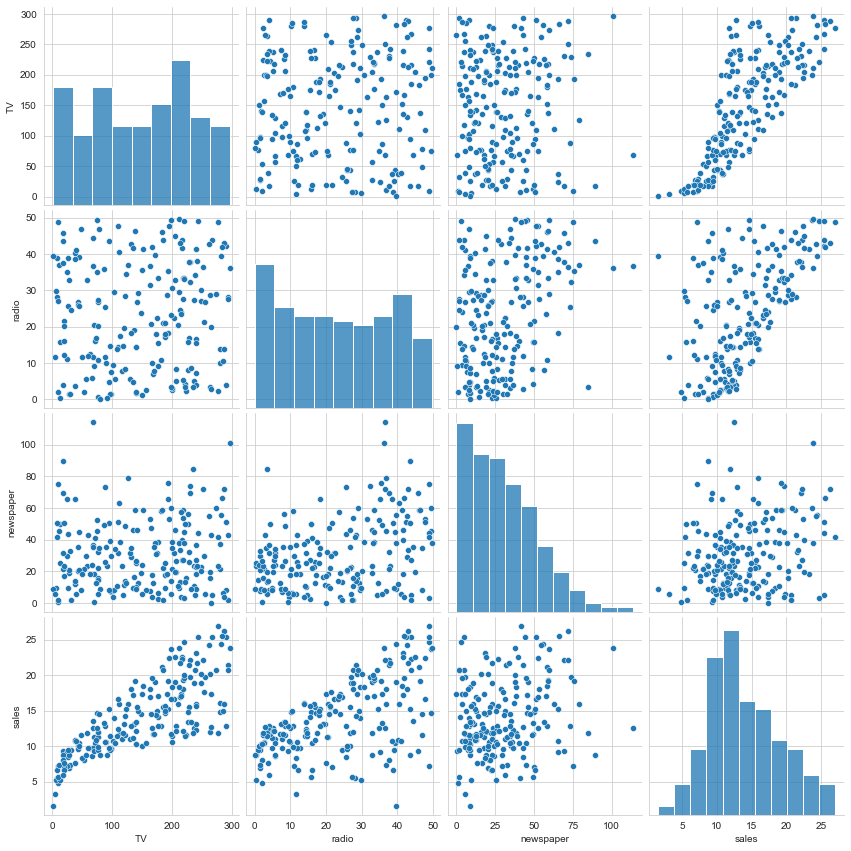

In [17]:
#data.plot(kind='scatter',x='TV',y='sales')#bivariado
#par a par
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,height=3)
plt.show()

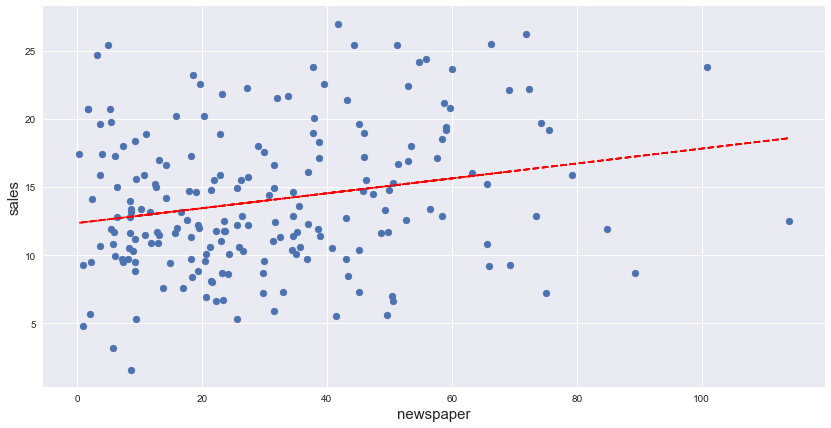

In [34]:
x = data['TV']
y = data['sales']
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(x , y )
plt.xlabel('TV')
plt.ylabel('sales')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [ ]:
x = data['newspaper']
y = data['sales']
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(x , y )
plt.xlabel('newspaper')
plt.ylabel('sales')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [19]:
columnas_regresores=data[['TV', 'radio', 'newspaper']]
columna_y=data['sales']
X = sm.add_constant(columnas_regresores)
reg = sm.OLS(columna_y,X)
model_fit=reg.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 28 May 2022   Prob (F-statistic):           1.58e-96
Time:                        11:31:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

c:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


In [24]:


plt.style.use('seaborn') # pretty matplotlib plots

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

model_exog=model_fit.model.exog
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)

In [25]:
#Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_residuals, model_exog)

lzip(names,test)

[('Lagrange multiplier statistic', 5.132872353285567),
 ('p-value', 0.16232215845412676),
 ('f-value', 1.720904210291578),
 ('f p-value', 0.1639990890560742)]

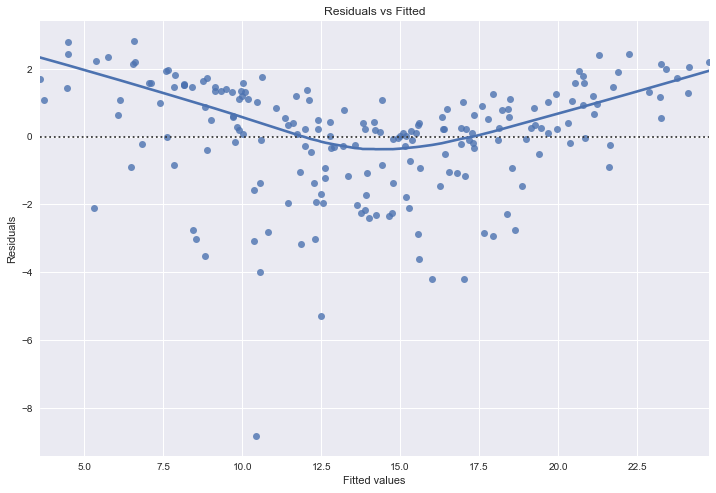

In [26]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x = model_fitted_y[:500],
                    y = model_residuals[:500],
                    data = data,
                    lowess = True)
  
# show the plot


plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plt.show()

c:\Users\marti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\Users\marti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


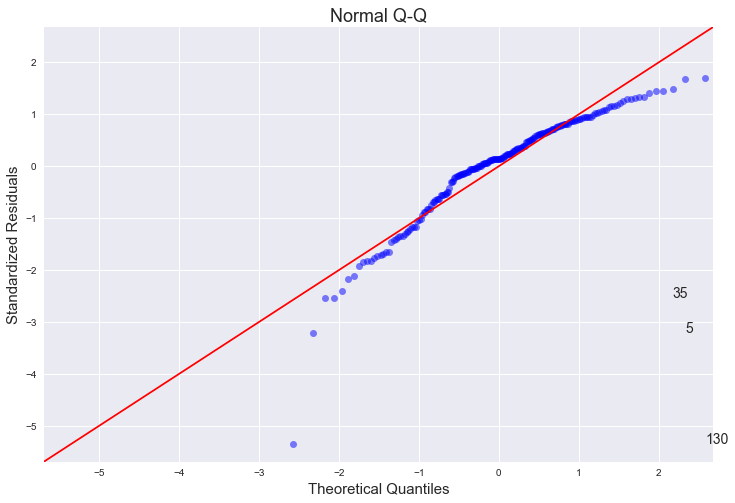

In [33]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));